<a href="https://colab.research.google.com/github/VctrEman/Clustering/blob/main/Clustering_for_proper_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn import preprocessing

#scipy toolkit

from sklearn.cluster import KMeans

In [3]:
!wget 'https://raw.githubusercontent.com/VctrEman/Data-for-mL/master/clustering_test_data.csv'

--2021-10-04 10:30:22--  https://raw.githubusercontent.com/VctrEman/Data-for-mL/master/clustering_test_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 691484 (675K) [text/plain]
Saving to: ‘clustering_test_data.csv’

clustering_test_dat 100%[===================>] 675.28K  --.-KB/s    in 0.05s   

2021-10-04 10:30:23 (12.0 MB/s) - ‘clustering_test_data.csv’ saved [691484/691484]



In [4]:
df = pd.read_csv('clustering_test_data.csv',)
df.head()

,id+,Segment,Monetary,Units,days last purchase,Customer lifetime
0,PK3550404,champions,2686.92,15,1,364
1,IN2162058,champions,3542.64,24,1,364
2,BD2613036,champions,3690.42,13,1,364
3,ID3523122,champions,4057.92,17,1,364
4,CN689370,champions,4083.90,12,1,364


In [5]:
print(df.describe())
sample = df.iloc[:,[2,3,4,5]].sample(n=150, random_state=1)
#sns.pairplot(df)

           Monetary          Units  days last purchase  Customer lifetime
count  1.656900e+04   16569.000000        16569.000000       16569.000000
mean   2.188860e+04      78.787072          118.326151         140.274609
std    2.857654e+05    3403.976040          110.634210         138.757109
min    0.000000e+00       1.000000            1.000000           0.000000
25%    1.176840e+03       1.000000           22.000000           0.000000
50%    3.245280e+03       4.000000           78.000000         105.000000
75%    1.051254e+04      12.000000          204.000000         287.000000
max    2.148356e+07  390000.000000          365.000000         364.000000


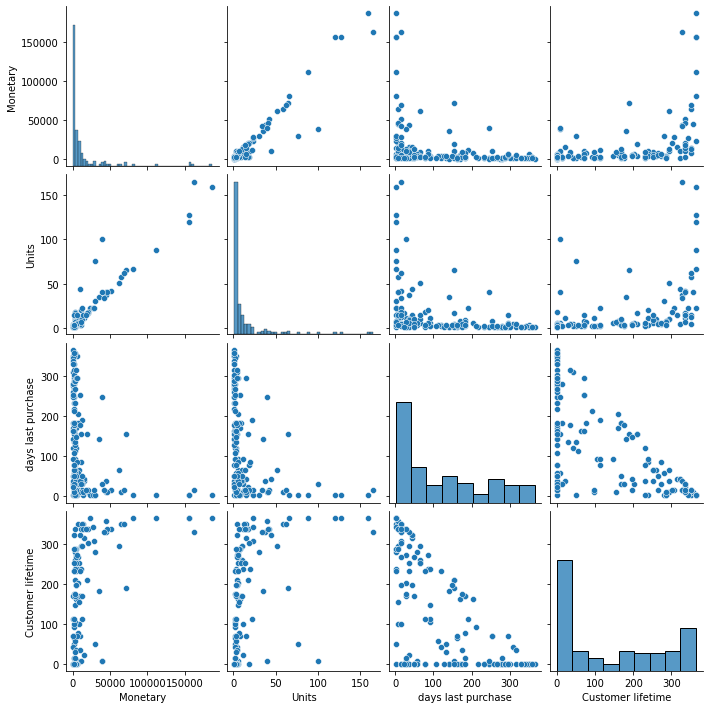

In [6]:
sns.pairplot( sample )

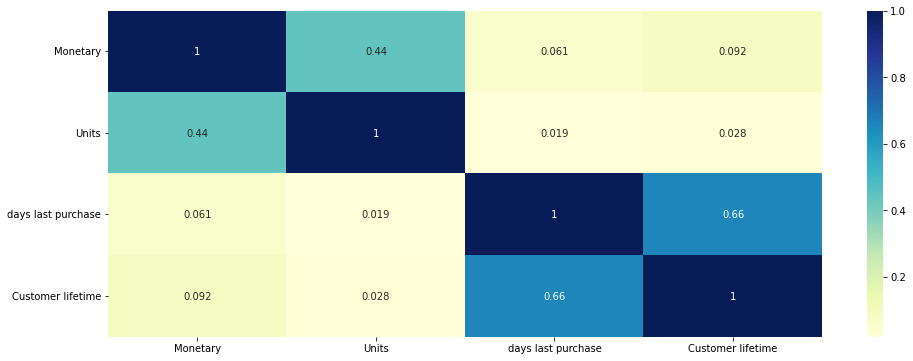

In [7]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr().abs(),  annot=True, cmap="YlGnBu")

In [8]:
x = df.iloc[:,[2,3,4,5]].values

In [9]:
"""Data Standardization give data zero mean and unit variance, it is good practice,
 especially for algorithms such as KNN which is based on distance of cases:
"""

X = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
X[0:5]

array([[-0.06719588, -0.01873956, -1.06051909,  1.6124013 ],
       [-0.06420131, -0.01609551, -1.06051909,  1.6124013 ],
       [-0.06368415, -0.01932712, -1.06051909,  1.6124013 ],
       [-0.0623981 , -0.01815199, -1.06051909,  1.6124013 ],
       [-0.06230718, -0.0196209 , -1.06051909,  1.6124013 ]])

In [10]:
X.mean(axis=0)

array([-9.22003067e-18,  6.43257954e-19, -5.40336681e-17, -8.23370181e-17])

In [11]:
X.std(axis=0)

array([1., 1., 1., 1.])

In [12]:
X.max(axis=0)

array([ 75.10466881, 114.55221054,   2.22970175,   1.6124013 ])

In [13]:
X.min(axis=0)

array([-0.0765987 , -0.02285252, -1.06051909, -1.01096689])

In [14]:
df.mean() + 3*df.std()

Monetary              879184.756003
Units                  10290.715193
days last purchase       450.228782
Customer lifetime        556.545936
dtype: float64

In [15]:
upper_limit = df.mean() + 3*df.std()
lower_limit = df.mean() - 3*df.std()

In [16]:
X[((X < 3) | (X <3)).all(axis=1)].max(axis=0)

array([2.87589163, 2.73253792, 2.22970175, 1.6124013 ])

In [17]:
#dealing with outliers
#https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/
df[((X < 3) | (X <5)).all(axis=1)].describe()

,Monetary,Units,days last purchase,Customer lifetime
count,1.654300e+04,16543.000000,16543.000000,16543.000000
mean,1.429815e+04,20.724113,118.489391,139.986883
std,4.763470e+04,197.052398,110.637044,138.651681
min,0.000000e+00,1.000000,1.000000,0.000000
25%,1.176240e+03,1.000000,22.000000,0.000000
50%,3.229320e+03,4.000000,78.000000,105.000000
75%,1.045617e+04,12.000000,204.000000,287.000000
max,1.349228e+06,11400.000000,365.000000,364.000000


In [18]:
df.describe()

,Monetary,Units,days last purchase,Customer lifetime
count,1.656900e+04,16569.000000,16569.000000,16569.000000
mean,2.188860e+04,78.787072,118.326151,140.274609
std,2.857654e+05,3403.976040,110.634210,138.757109
min,0.000000e+00,1.000000,1.000000,0.000000
25%,1.176840e+03,1.000000,22.000000,0.000000
50%,3.245280e+03,4.000000,78.000000,105.000000
75%,1.051254e+04,12.000000,204.000000,287.000000
max,2.148356e+07,390000.000000,365.000000,364.000000


In [19]:

df2 = df[((X < 3) | (X <3)).all(axis=1)].copy()
df2.head()

,id+,Segment,Monetary,Units,days last purchase,Customer lifetime
0,PK3550404,champions,2686.92,15,1,364
1,IN2162058,champions,3542.64,24,1,364
2,BD2613036,champions,3690.42,13,1,364
3,ID3523122,champions,4057.92,17,1,364
4,CN689370,champions,4083.90,12,1,364


In [20]:
x1 = df2.iloc[:,[2,3,4,5]].values
X1 = preprocessing.StandardScaler().fit(x1).transform(x1.astype(float))
X1[0:5]

array([[-0.27884075, -0.02294009, -1.06263347,  1.61749501],
       [-0.25693245,  0.05151949, -1.06263347,  1.61749501],
       [-0.25314896, -0.03948666, -1.06263347,  1.61749501],
       [-0.24374016, -0.00639352, -1.06263347,  1.61749501],
       [-0.24307501, -0.04775995, -1.06263347,  1.61749501]])

In [21]:
X1.max(axis=0)

array([21.25277616, 77.45639078,  2.22748658,  1.61749501])

In [22]:
X1.max(axis=0)

array([21.25277616, 77.45639078,  2.22748658,  1.61749501])

In [23]:
#methods
range_n_clusters = range(2,12)
wcss = []
silhouette_avg = []
def evaluations(x):
    range_n_clusters = range(2,12)
    for i in range_n_clusters:
        kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0,)
        kmeans.fit( x )
        cluster_labels = kmeans.labels_
        #Wcss
        wcss.append(kmeans.inertia_)
        #Silhouette
        silhouette_avg.append(silhouette_score( x, cluster_labels))
    return wcss, silhouette_avg

In [24]:
wcss, silhouette_avg = evaluations(X1)

Text(0, 0.5, 'WCSS %')

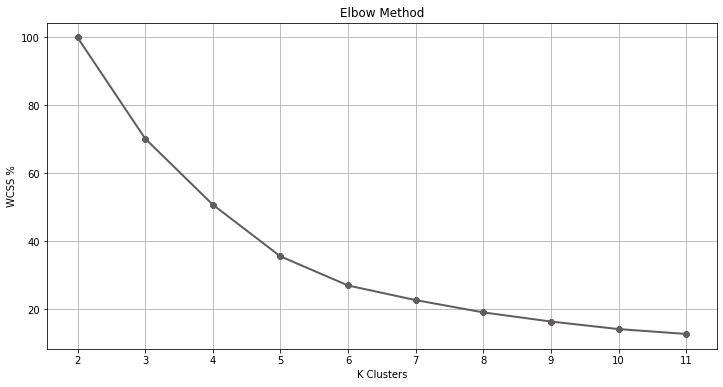

In [25]:
# WCSS
plt.figure(figsize=(12,6))
plt.grid()
plt.xticks(range_n_clusters)
plt.plot( range_n_clusters, wcss/max(wcss)*100,linewidth=2,  c='#625D5D', marker ="8")
plt.title('Elbow Method')
plt.xlabel('K Clusters')
plt.ylabel('WCSS %')

Text(0, 0.5, 'WCSS %')

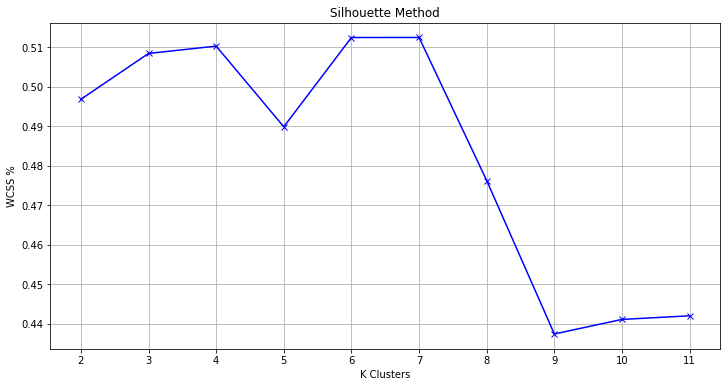

In [26]:
plt.figure(figsize=(12,6))
plt.grid()
plt.xticks(range_n_clusters)
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.title('Silhouette Method')
plt.xlabel('K Clusters')
plt.ylabel('WCSS %')

In [27]:
#Kmeans model
kmeans = KMeans(n_clusters = 7, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X1)
df2["cluster"] = y_kmeans

In [28]:
df2.cluster.value_counts()

0    6085
3    5061
1    4632
4     648
6      90
2      13
5       2
Name: cluster, dtype: int64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf069eb2d0>,
      dtype=object)

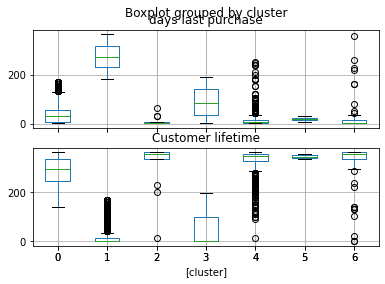

In [29]:
df2.boxplot(column=['days last purchase', 'Customer lifetime', ],by=['cluster',],layout=(2, 1) )


In [30]:
df2.groupby('cluster').mean()

,Monetary,Units,days last purchase,Customer lifetime
cluster,,,,
0,14024.285995,17.402958,37.722104,286.505341
1,2928.146813,3.158463,274.439767,19.035406
2,450381.586154,2085.923077,11.230769,307.461538
3,3541.703225,3.894487,88.041494,45.486860
4,104992.228981,107.175926,17.462963,333.537037
5,669636.090000,8476.500000,18.500000,346.500000
6,360074.011333,444.944444,23.944444,324.177778


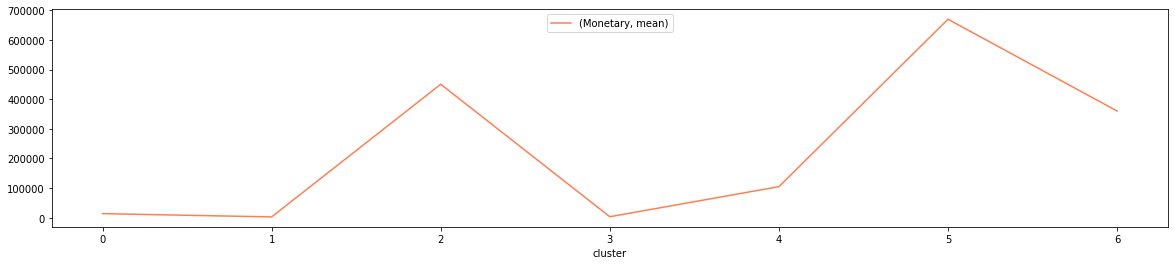

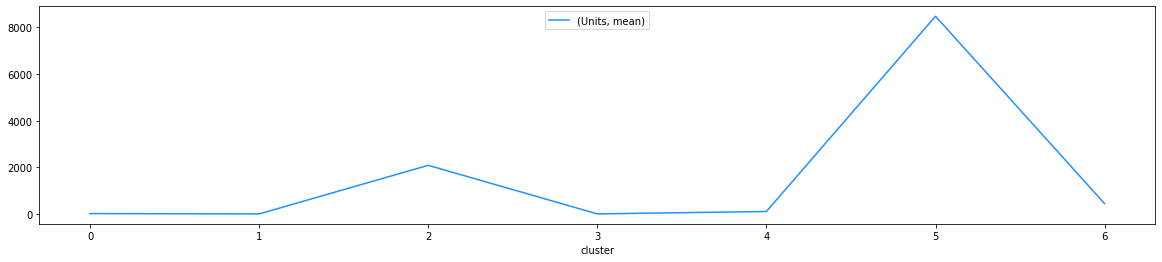

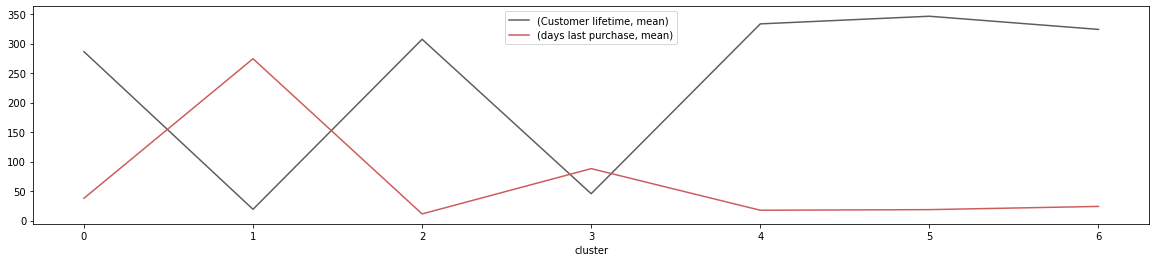

In [31]:
df.groupby(df2.cluster)[['Monetary']].agg([np.mean]).plot(figsize=(20,4), c= '#FF7F50',);
plt.legend(loc = 'upper center')
df.groupby(df2.cluster)[['Units']].agg([np.mean]).plot(figsize=(20,4), c= 'dodgerblue',);
plt.legend(loc = 'upper center')
df.groupby(df2.cluster)[['Customer lifetime','days last purchase']].agg([np.mean]).plot(figsize=(20,4), color=['#625D5D','#CD5C5C'] );
plt.legend(loc = 'upper center')


In [32]:
print(kmeans.cluster_centers_) 

[[ 1.19972344e-02 -2.72994413e-03 -7.30962102e-01  1.05879677e+00]
 [-2.72664814e-01 -1.20908524e-01  1.40893153e+00 -8.71748806e-01]
 [ 1.11831188e+01  1.71104005e+01 -9.70159677e-01  1.20951686e+00]
 [-2.56928231e-01 -1.14810668e-01 -2.75894426e-01 -6.80507526e-01]
 [ 2.34640000e+00  7.40280236e-01 -9.13626538e-01  1.39704525e+00]
 [ 1.67965121e+01  6.99814762e+01 -9.04454617e-01  1.49121606e+00]
 [ 8.87104799e+00  3.53411361e+00 -8.55243420e-01  1.33014025e+00]]


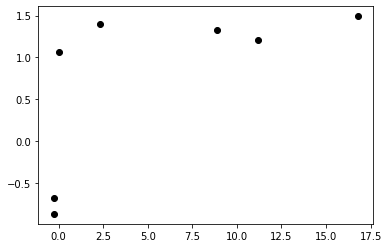

In [33]:
plt.scatter(kmeans.cluster_centers_[:,   0], kmeans.cluster_centers_[:,3], c = 'black',)

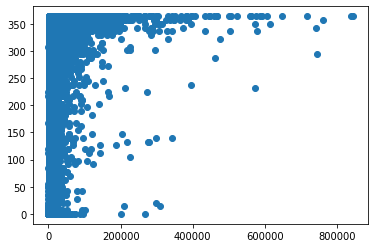

In [37]:
plt.scatter(df2.iloc[:,[2]],df2.iloc[:,[5],])